<a href="https://colab.research.google.com/github/bkvkrll/Introduction-to-Neural-Networks/blob/main/lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическое задание

Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

*Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM

*Предложите свои варианты решения проблемы исчезающего градиента в RNN

In [300]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [301]:
!pip install tensorflow -latest


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -l


In [302]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [303]:
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [304]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, Flatten

In [305]:
passengers_data = pd.read_csv("airline-passengers.csv")
passengers_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


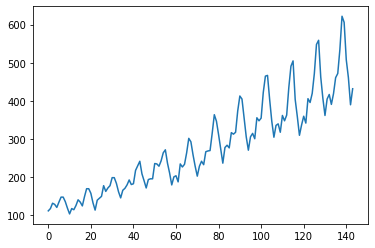

In [306]:
plt.plot(passengers_data['Passengers'])

In [307]:
data = passengers_data['Passengers']
data = np.array(data).reshape(-1,1)
data[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

In [308]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data.min(),data.max()

(0.0, 1.0)

In [309]:
train_size = 100
test_size = 44
train = data[0:train_size, :]
train.shape

(100, 1)

In [310]:
test = data[train_size:144, :]
test.shape

(44, 1)

In [311]:
def get_data(data, look_back=10):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [312]:
X_train, y_train = get_data(test, look_back=10)
X_test, y_test = get_data(test, look_back=10)

In [313]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [314]:
X_train.shape

(33, 10, 1)

In [315]:
X_test.shape

(33, 10, 1)

**Обучаем LSTMс различными параметрами**

In [316]:
look_back = 10
model = Sequential()

model.add(LSTM(64,return_sequences=False,input_shape=( look_back,1)))

model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])


In [317]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 64)                16896     
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [318]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
33/33 [==============================] - 3s 4ms/step - loss: 0.1635 - accuracy: 0.0000e+00
Epoch 2/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.0303
Epoch 3/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.0303
Epoch 4/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.0303
Epoch 5/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.0303
Epoch 6/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.0303
Epoch 7/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.0303
Epoch 8/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.0303
Epoch 9/25
33/33 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.0303
Epoch 10/25
33/33 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.0303
Epoch 11/25
33/

In [319]:
y_pred1 = model.predict(X_test)

2/2 [==============================] - 1s 7ms/step


In [320]:
y_pred1 = scaler.inverse_transform(y_pred1)
y_test1 = np.array(y_test)
y_test1 = y_test1.reshape(-1, 1)
y_test1 = scaler.inverse_transform(y_test1)

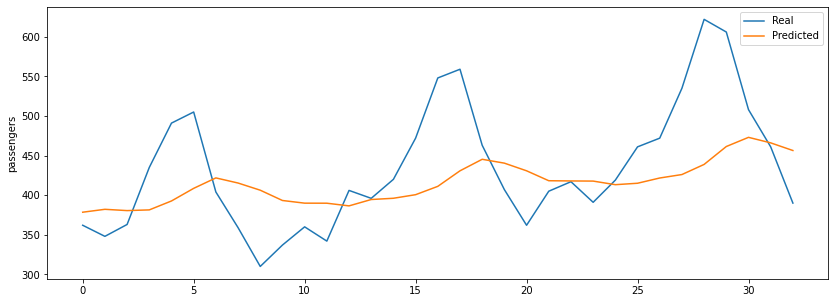

In [321]:
plt.figure(figsize=(14,5))
plt.plot(y_test1, label = 'Real')
plt.plot(y_pred1, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

In [322]:
look_back = 10
model = Sequential()

model.add(LSTM(512,return_sequences=False,input_shape=( look_back,1)))

model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [323]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 512)               1052672   
                                                                 
 dense_29 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


In [324]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
33/33 [==============================] - 3s 30ms/step - loss: 0.0568 - accuracy: 0.0303
Epoch 2/25
33/33 [==============================] - 2s 50ms/step - loss: 0.0369 - accuracy: 0.0303
Epoch 3/25
33/33 [==============================] - 2s 53ms/step - loss: 0.0329 - accuracy: 0.0303
Epoch 4/25
33/33 [==============================] - 2s 52ms/step - loss: 0.0339 - accuracy: 0.0303
Epoch 5/25
33/33 [==============================] - 2s 51ms/step - loss: 0.0303 - accuracy: 0.0303
Epoch 6/25
33/33 [==============================] - 2s 52ms/step - loss: 0.0219 - accuracy: 0.0303
Epoch 7/25
33/33 [==============================] - 2s 50ms/step - loss: 0.0196 - accuracy: 0.0303
Epoch 8/25
33/33 [==============================] - 2s 54ms/step - loss: 0.0237 - accuracy: 0.0303
Epoch 9/25
33/33 [==============================] - 2s 49ms/step - loss: 0.0223 - accuracy: 0.0303
Epoch 10/25
33/33 [==============================] - 2s 49ms/step - loss: 0.0167 - accuracy: 0.0303
Epoch 11/

In [325]:
y_pred2 = model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [326]:
y_pred2 = scaler.inverse_transform(y_pred2)
y_test2 = np.array(y_test)
y_test2 = y_test2.reshape(-1, 1)
y_test2 = scaler.inverse_transform(y_test2)

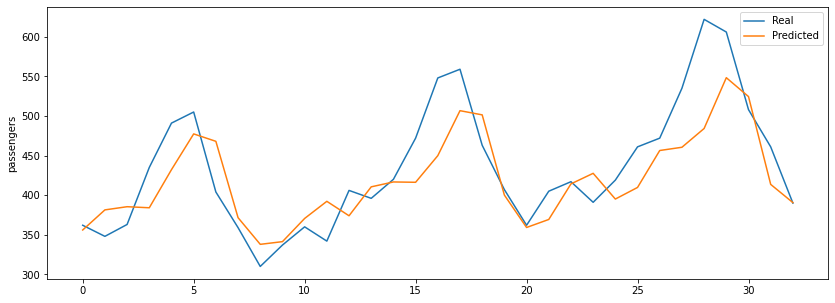

In [327]:
plt.figure(figsize=(14,5))
plt.plot(y_test2, label = 'Real')
plt.plot(y_pred2, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

При увеличение количества скрытых состояний с 64 (loss: 0.0182 - accuracy: 0.0303) на 512 (loss: 0.0082 - accuracy: 0.0303) модель показывает результат значительно лучше

Добавим второй слой

In [328]:
look_back = 10
model = Sequential()

model.add(LSTM(512,return_sequences=True,input_shape=( look_back,1)))
model.add(LSTM(256,return_sequences=False,input_shape=( look_back,1)))
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [329]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 10, 512)           1052672   
                                                                 
 lstm_46 (LSTM)              (None, 256)               787456    
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,840,385
Trainable params: 1,840,385
Non-trainable params: 0
_________________________________________________________________


In [330]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
33/33 [==============================] - 4s 47ms/step - loss: 0.0909 - accuracy: 0.0000e+00
Epoch 2/25
33/33 [==============================] - 2s 47ms/step - loss: 0.0376 - accuracy: 0.0303
Epoch 3/25
33/33 [==============================] - 2s 49ms/step - loss: 0.0316 - accuracy: 0.0303
Epoch 4/25
33/33 [==============================] - 2s 48ms/step - loss: 0.0360 - accuracy: 0.0303
Epoch 5/25
33/33 [==============================] - 2s 47ms/step - loss: 0.0331 - accuracy: 0.0303
Epoch 6/25
33/33 [==============================] - 2s 48ms/step - loss: 0.0223 - accuracy: 0.0303
Epoch 7/25
33/33 [==============================] - 2s 46ms/step - loss: 0.0205 - accuracy: 0.0303
Epoch 8/25
33/33 [==============================] - 2s 48ms/step - loss: 0.0235 - accuracy: 0.0303
Epoch 9/25
33/33 [==============================] - 2s 47ms/step - loss: 0.0241 - accuracy: 0.0303
Epoch 10/25
33/33 [==============================] - 2s 47ms/step - loss: 0.0168 - accuracy: 0.0303
Epoch

In [331]:
y_pred3 = model.predict(X_test)

2/2 [==============================] - 1s 13ms/step


In [332]:
y_pred3 = scaler.inverse_transform(y_pred3)
y_test3 = np.array(y_test)
y_test3 = y_test3.reshape(-1, 1)
y_test3 = scaler.inverse_transform(y_test3)

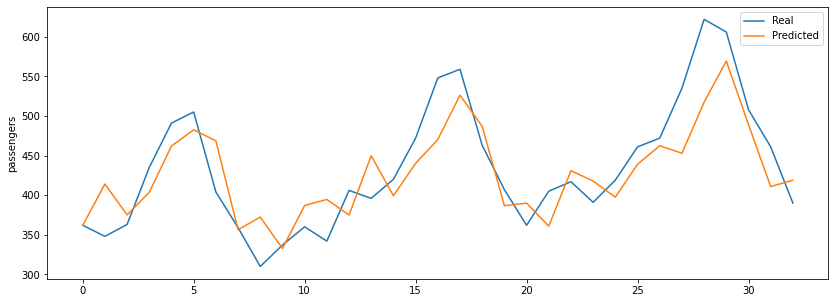

In [333]:
plt.figure(figsize=(14,5))
plt.plot(y_test3, label = 'Real')
plt.plot(y_pred3, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

Добавление слоя улучшило предсказание не значительно loss: 0.0085 - accuracy: 0.0303

Попробуем добавить еще слои и увеличить количество эпох

In [334]:
look_back = 10
model = Sequential()

model.add(LSTM(512,return_sequences=True,input_shape=( look_back,1)))
model.add(LSTM(256,return_sequences=True,input_shape=( look_back,1)))
model.add(LSTM(128,return_sequences=False,input_shape=( look_back,1)))
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [335]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
33/33 [==============================] - 7s 57ms/step - loss: 0.0704 - accuracy: 0.0000e+00
Epoch 2/50
33/33 [==============================] - 2s 56ms/step - loss: 0.0359 - accuracy: 0.0303
Epoch 3/50
33/33 [==============================] - 2s 56ms/step - loss: 0.0325 - accuracy: 0.0303
Epoch 4/50
33/33 [==============================] - 2s 56ms/step - loss: 0.0414 - accuracy: 0.0000e+00
Epoch 5/50
33/33 [==============================] - 2s 55ms/step - loss: 0.0362 - accuracy: 0.0303
Epoch 6/50
33/33 [==============================] - 2s 57ms/step - loss: 0.0311 - accuracy: 0.0303
Epoch 7/50
33/33 [==============================] - 2s 57ms/step - loss: 0.0270 - accuracy: 0.0303
Epoch 8/50
33/33 [==============================] - 2s 57ms/step - loss: 0.0317 - accuracy: 0.0303
Epoch 9/50
33/33 [==============================] - 2s 56ms/step - loss: 0.0314 - accuracy: 0.0000e+00
Epoch 10/50
33/33 [==============================] - 2s 57ms/step - loss: 0.0240 - accuracy: 0.03

In [336]:
y_pred4 = model.predict(X_test)

2/2 [==============================] - 1s 14ms/step


In [337]:
y_pred4 = scaler.inverse_transform(y_pred4)
y_test4 = np.array(y_test)
y_test4 = y_test4.reshape(-1, 1)
y_test4 = scaler.inverse_transform(y_test4)

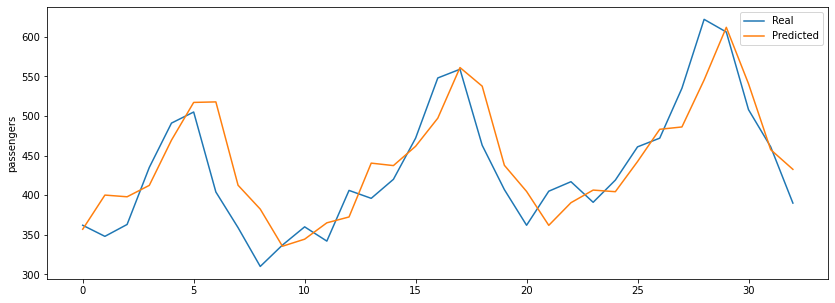

In [338]:
plt.figure(figsize=(14,5))
plt.plot(y_test4, label = 'Real')
plt.plot(y_pred4, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

Еще не значительное увеличение loss: 0.0080 - accuracy: 0.0303. Нужно принимать решение о дальнейшем улучшении учитывая имеющиеся в наличии мощности